# Importing Libraries

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Downloading Financial Data

In [2]:
stocks = ["HDFCBANK.NS", "ICICIBANK.NS", "AXISBANK.NS", "SBIN.NS"]
#Any random number of stocks can be added or dropped(Make sure to also edit portfoliostd function accordingly)

stocks = yf.download(stocks, start = "2022-01-01", end = "2023-10-02")
#Start and End time can be configured

[*********************100%%**********************]  4 of 4 completed


# Creating Log Return Data Frame

In [3]:
#Creating a data frame with the log returns
stocks_lr = np.log(1+stocks["Adj Close"].pct_change())
stocks_lr.dropna()

,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,SBIN.NS
Date,,,,
2022-01-04,0.018215,0.005840,0.010601,0.026618
2022-01-05,0.024722,0.023470,0.019477,0.018240
2022-01-06,0.004667,-0.016170,-0.003814,-0.001423
2022-01-07,0.000411,0.006990,0.010391,-0.000916
2022-01-10,0.016561,0.005531,0.021821,0.024928
...,...,...,...,...
2023-09-25,0.000687,0.000882,0.006346,-0.006878
2023-09-26,-0.004722,0.004334,-0.008031,0.000589
2023-09-27,0.010837,-0.007049,-0.005920,-0.007854


# Creating Function to Calculate Portfolio Return

## Portfolio Return is given by: 
### (Asset 1 Weight x Expected Return) + (Asset 2 Weight x Expected Return)..


In [4]:
#Function to calculate portfolio return
def portfolioreturn(weights):
    return np.dot(stocks_lr.mean(),weights)*252

# Function to Calculate Portfolio Standard Deviation (Risk)
## Portfolio Risk is given by(example for 3 asset portfolio):
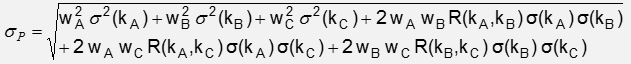

In [5]:
def portfoliostd(weights):
    return (np.dot(np.dot(stocks_lr.cov(),weights),weights))**(1/2)*np.sqrt(252)


# Function to Generate Random Weights

In [6]:
def weightscreator(stocks_lr):
    rand = np.random.random(len(stocks_lr.columns))
    rand /= rand.sum()
    return rand 

# Function to Find Returns and Standard Deviation for "i" Random Portfolio Weight Arrays

In [7]:
returns = []
stds = []
w = []

for i in range(100000): #Use the number of iterations you seem fit
    weights = weightscreator(stocks_lr)
    returns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

# Using MatPlotLib To Plot the Efficient Frontier

## Where Efficient Frontier is the graph between Portfolio Risk and Return

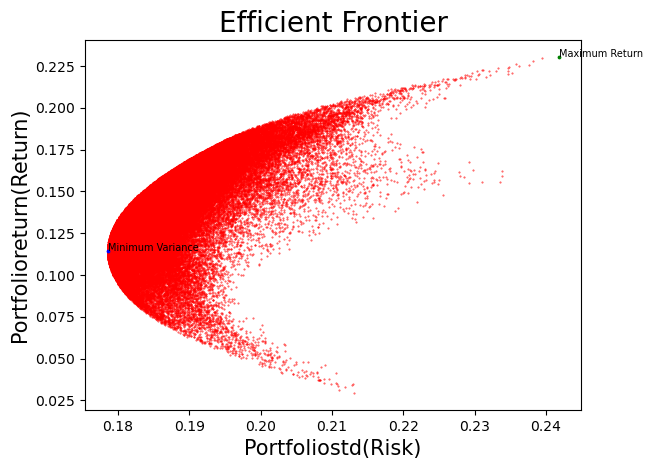

<Figure size 3000x2000 with 0 Axes>

In [8]:
plt.scatter(stds,returns,c="red",s=0.2,alpha=0.75) #Customise size according to number of iterations being plotter
plt.scatter(stds[returns.index(max(returns))], max(returns),c = "green", s=3) #Customise size for this too
plt.text(stds[returns.index(max(returns))],max(returns),"Maximum Return", fontsize=7) #Customise font size for this too
plt.scatter(min(stds),returns[stds.index(min(stds))] ,c = "blue", s=3) #Customise size for this too
plt.text(min(stds),returns[stds.index(min(stds))],"Minimum Variance", fontsize=7) #Customise font size for this too
plt.title("Efficient Frontier", fontsize = 20)
plt.xlabel("Portfoliostd(Risk)", fontsize = 15)
plt.ylabel("Portfolioreturn(Return)", fontsize = 15)
plt.figure(figsize=(30,20))
plt.show()

## Finding Max Returns and Associated Risk

In [9]:
print("Max return =", max(returns))
print("Corresponding Standard Deviation =", stds[returns.index(max(returns))])

Max return = 0.2304217091185653
Corresponding Standard Deviation = 0.24175283474767814


# Creating a Function to Return Weights of Portfolios with Returns >= Max Returns According to Efficient Frontier

In [ ]:
for i in range(1000000): #Use the number of iterations you seem fit
    weights = weightscreator(stocks_lr)
    if (portfolioreturn(weights) >= max(returns)):
        weight_new = weights
        print("Your Efficient Portfolio is:",weight_new) #Returns portfolio weights for above condition being satisfied
        break
         

In [ ]:
print("Returns corresponding to weights found :",portfolioreturn(weight_new)) #Prints return of found weights
print("Risk associated with weights found :",portfoliostd(weight_new)) #Prints Risk of found weights